In [1]:
import os
from os import listdir
from os.path import isfile, join

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

In [3]:
data_dir = 'priv_data'

appname = 'dyldo_y2019_full'
data_size_dir = 'DyLDO-ext'

appname = 'BSBM'
data_size_dir = 'BSBM'
collections = ['schemex', 'attribute', 'type'] #, 'AttributeCollection', 'TypeCollection'
suffix = ''

curr_dir = join(data_dir, data_size_dir)
onlyfiles = [f for f in listdir(curr_dir) if isfile(join(curr_dir, f)) and f.endswith(".txt")]
onlyfiles = sorted(onlyfiles)

edgecounts = {}
tmp = 0
for filename in onlyfiles:
    # first line: number of types in dataset (not unique)
    # second line: number of edges in dataset (not unique)
    f = open(join(curr_dir,filename), 'r')
    content = f.read().split('\n')
    
    #print(filename)
    #print(content)
    types = int(content[0])
    edges = int(content[1])
    bytez = int(content[2])

    if 'iteration' in filename:
        iteration = filename.replace('iteration', '')
        iteration = iteration.replace('-', '')
        iteration = iteration.replace('.txt', '')
        iteration = iteration.replace('.gz', '')
        iteration = iteration.replace('.nq', '')
        iteration = iteration.replace('.nt', '')
               
        edgecounts[int(iteration)] = [edges, types, bytez]
    else:
        edgecounts[tmp] = [edges, types, bytez]
        tmp = tmp + 1
        
edgeframe = pd.DataFrame.from_dict(edgecounts, columns=['edges', 'types', 'bytes'], orient='index')
edgeframe = pd.DataFrame.sort_index(edgeframe)
# clean the error in dataset
if data_size_dir == 'DyLDO-core':
    edgeframe = edgeframe.drop(edgeframe.index[[21]])
display(edgeframe)

,edges,types,bytes
0,67622,7928,2211932
1,649327,75978,21023798
2,1288794,148777,41406662
3,1936770,224092,62369214
4,2567969,295186,82387202
5,3198518,366255,102367027
6,3829244,437334,122441687
7,4459938,508419,142516687
8,5090583,579497,162615460
9,5721236,650591,182748437


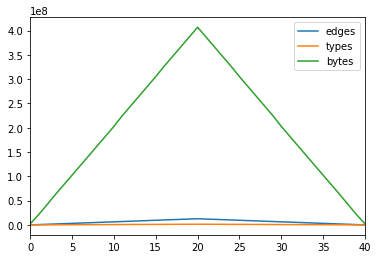

In [4]:
edgeframe = edgeframe.fillna(method='pad')
ax = edgeframe.plot()


array([31.97983418])

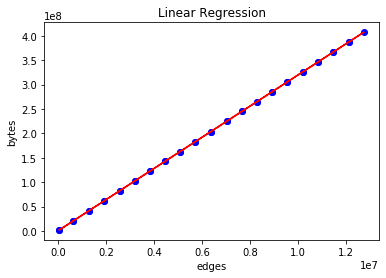

In [5]:
paramX = 0
paramY = 2
correlation_frame = edgeframe

X = correlation_frame.iloc[:, paramX:paramX+1].values 
#display(X)
y = correlation_frame.iloc[:, paramY].values 
lin = LinearRegression() 

lin.fit(X, y) 
display(lin.coef_)
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel(correlation_frame.columns[paramX]) 
plt.ylabel(correlation_frame.columns[paramY]) 

plt.show() 

In [6]:
size_frame = pd.DataFrame()
iterations = 0
for collection in collections:
    with open(os.path.join(data_dir, appname + '_'+collection+suffix+'-update-time-and-space.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
        df.head()
#         tmpFrame = pd.DataFrame()
#         tmpFrame['A'] = df['SE links']
#         tmpFrame['B'] = df['Imprint links']

#         tmpFrame = pd.DataFrame()
#         tmpFrame['A'] = df['Schema Elements (SE)']
#         tmpFrame['B'] = df['Schema Relations (SR)']

        #df['Summary Graph Size'] = tmpFrame.sum(axis=1)

        del df['SecondaryIndex Read time (ms)']
        del df['SecondaryIndex Write time (ms)']
        del df['SecondaryIndex Del time (ms)']
        #--->
        del df['SecondaryIndex Total time (ms)']
        #<----
        # number of primary vertices
        #del df['SE links']
        if not size_frame.empty:
            del df['Imprint links']
        del df['Checksum links']
        #del df['Schema Elements (SE)']
        #del df['Schema Relations (SR)']

        del df['SG Read time (ms)']
        del df['SG Write time (ms)']
        del df['SG Del time (ms)']

        #del df['Sec. Index Size (bytes)']
        del df['Index Size (bytes)']
        del df['Graph Size (bytes)']
        iterations = max(iterations, len(df['Iteration']))
        df = df.set_index('Iteration')
        #print(df.columns)
        if not size_frame.empty:
            df.columns = [collection+'|[v]|', collection+'VHI', collection+'|V_sg|', collection+'|E_sg|']
        else:
            df.columns = [collection+'|[v]|', '|V|', collection+'VHI', collection+'|V_sg|', collection+'|E_sg|']  

        if not size_frame.empty:
            size_frame = size_frame.join(df, how='outer', lsuffix='_left', rsuffix='_right')
        else:
            size_frame = df

    

display(size_frame)

,schemex|[v]|,|V|,schemexVHI,schemex|V_sg|,schemex|E_sg|,attribute|[v]|,attributeVHI,attribute|V_sg|,attribute|E_sg|,type|[v]|,typeVHI,type|V_sg|,type|E_sg|
Iteration,,,,,,,,,,,,,
0,362,7328,153284,385,3809,48,139165,49,554,23,129269,23,0
1,2410,67978,1564296,2514,26016,49,1363120,50,569,103,1329934,103,0
2,3614,132776,3125938,3750,39761,49,2695048,50,569,135,2666370,135,0
3,6758,200090,4894754,7022,73491,49,4090770,50,569,263,3848735,263,0
4,7347,263183,6255374,7612,81188,50,5404917,51,584,264,5343991,264,0
5,7745,326247,7812930,8011,86436,51,6683627,52,604,265,6604132,265,0
6,8073,389321,9288894,8339,90897,52,7978678,53,622,265,7889244,265,0
7,8376,452402,10669462,8643,94980,54,9267514,55,661,266,9156965,266,0
8,8683,515472,12134538,8950,99199,57,10569970,58,711,266,10429172,266,0


In [7]:
size_frame = size_frame.join(edgeframe,how='left')
if data_size_dir == 'DyLDO-core':
    size_frame = size_frame.drop(size_frame.index[[21,22]])
display(size_frame)

,schemex|[v]|,|V|,schemexVHI,schemex|V_sg|,schemex|E_sg|,attribute|[v]|,attributeVHI,attribute|V_sg|,attribute|E_sg|,type|[v]|,typeVHI,type|V_sg|,type|E_sg|,edges,types,bytes
Iteration,,,,,,,,,,,,,,,,
0,362,7328,153284,385,3809,48,139165,49,554,23,129269,23,0,67622,7928,2211932
1,2410,67978,1564296,2514,26016,49,1363120,50,569,103,1329934,103,0,649327,75978,21023798
2,3614,132776,3125938,3750,39761,49,2695048,50,569,135,2666370,135,0,1288794,148777,41406662
3,6758,200090,4894754,7022,73491,49,4090770,50,569,263,3848735,263,0,1936770,224092,62369214
4,7347,263183,6255374,7612,81188,50,5404917,51,584,264,5343991,264,0,2567969,295186,82387202
5,7745,326247,7812930,8011,86436,51,6683627,52,604,265,6604132,265,0,3198518,366255,102367027
6,8073,389321,9288894,8339,90897,52,7978678,53,622,265,7889244,265,0,3829244,437334,122441687
7,8376,452402,10669462,8643,94980,54,9267514,55,661,266,9156965,266,0,4459938,508419,142516687
8,8683,515472,12134538,8950,99199,57,10569970,58,711,266,10429172,266,0,5090583,579497,162615460


0.07573690949925907

0.0017772161051794562

0.06419425114975079

0.0008593962403259239

0.06312865735443045

0.001308411387031724

,schemex|[v]|,|V|,schemexVHI,schemex|V_sg|,schemex|E_sg|,attribute|[v]|,attributeVHI,attribute|V_sg|,attribute|E_sg|,type|[v]|,typeVHI,type|V_sg|,type|E_sg|,edges,types,bytes,schemex:compression,attribute:compression,type:compression
Iteration,,,,,,,,,,,,,,,,,,,
0,362,7328,153284,385,3809,48,139165,49,554,23,129269,23,0,67622,7928,2211932,0.069299,0.062916,0.058442
1,2410,67978,1564296,2514,26016,49,1363120,50,569,103,1329934,103,0,649327,75978,21023798,0.074406,0.064837,0.063259
2,3614,132776,3125938,3750,39761,49,2695048,50,569,135,2666370,135,0,1288794,148777,41406662,0.075494,0.065087,0.064395
3,6758,200090,4894754,7022,73491,49,4090770,50,569,263,3848735,263,0,1936770,224092,62369214,0.078480,0.065590,0.061709
4,7347,263183,6255374,7612,81188,50,5404917,51,584,264,5343991,264,0,2567969,295186,82387202,0.075927,0.065604,0.064864
5,7745,326247,7812930,8011,86436,51,6683627,52,604,265,6604132,265,0,3198518,366255,102367027,0.076323,0.065291,0.064514
6,8073,389321,9288894,8339,90897,52,7978678,53,622,265,7889244,265,0,3829244,437334,122441687,0.075864,0.065163,0.064433
7,8376,452402,10669462,8643,94980,54,9267514,55,661,266,9156965,266,0,4459938,508419,142516687,0.074865,0.065028,0.064252
8,8683,515472,12134538,8950,99199,57,10569970,58,711,266,10429172,266,0,5090583,579497,162615460,0.074621,0.065000,0.064134


array([[1.22243372e+08]])

Text(0, 0.5, "['|V|']")

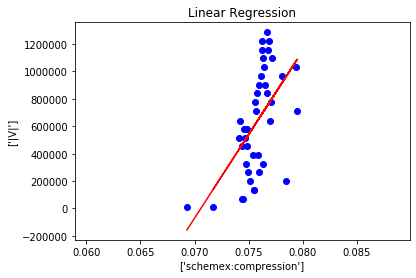

In [9]:
size_frame['schemex:compression'] = size_frame['schemexVHI'] / size_frame['bytes']

display(size_frame['schemex:compression'].mean())
display(size_frame['schemex:compression'].std())


size_frame['attribute:compression'] = size_frame['attributeVHI'] / size_frame['bytes']

display(size_frame['attribute:compression'].mean())
display(size_frame['attribute:compression'].std())

size_frame['type:compression'] = size_frame['typeVHI'] / size_frame['bytes']

display(size_frame['type:compression'].mean())
display(size_frame['type:compression'].std())


corr


x_values = ['schemex:compression'] #'change-ratio'
y_value = ['|V|']
X = size_frame[x_values].values # , 'change-ratio'
y = size_frame[y_value].values

display(size_frame)
lin = LinearRegression() 

lin.fit(X, y) 
display(lin.coef_)
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel(x_values) 
plt.ylabel(y_value) 

NameError: name 'lin2' is not defined

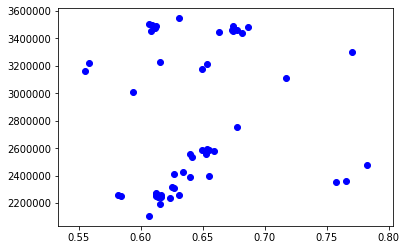

In [27]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Summariztaion Ratio') 
plt.ylabel('Data Overhead') 

plt.show() 


In [28]:
trend = np.polyfit(np.log(x), y, 1)
trend

NameError: name 'x' is not defined

In [100]:
np.polyfit(x, np.log(y), 1)

array([3.49613903e-05, 1.23710181e+01])

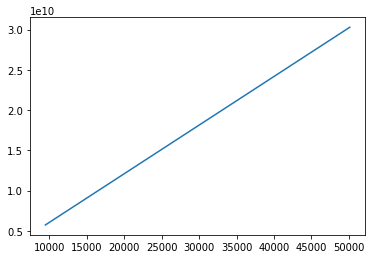

In [101]:
trendpoly = np.poly1d(trend) 
plt.plot(x,trendpoly(x))

In [49]:
lin3 = LinearRegression() 
lin3.fit(trend, y) 

plt.plot(X, lin2.predict(lin3.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Summariztaion Ratio') 
plt.ylabel('Data Overhead') 

ValueError: Expected 2D array, got 1D array instead:
array=[-22982041.98471013  67391500.56565765].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.